In [18]:
import pandas as pd
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt

In [39]:
df3 = pd.read_excel("~/DATA Sets/HYBRID(21ST FEB).xlsx",engine='openpyxl')
df3.shape

(87, 20)

In [40]:
df3 = pd.read_excel("~/DATA Sets/HYBRID(21ST FEB).xlsx",engine='openpyxl')
df3 = df3.drop(columns=["Unnamed: 17",'Unnamed: 18','Unnamed: 19'],axis=1)
df3.shape

(87, 17)

In [41]:
df3=df3.dropna()
df3.shape
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TIME                 86 non-null     object 
 1   Isc( ma)             86 non-null     float64
 2   Insolation           86 non-null     float64
 3   E(instantaneous)     86 non-null     float64
 4   Ip(amps)             86 non-null     float64
 5   Vp(volt)             86 non-null     float64
 6   Q(flow)              86 non-null     float64
 7   FLOW IN M3           86 non-null     float64
 8   E h(instantaneous)   86 non-null     float64
 9   PRESSURE(kg/cm2)     86 non-null     float64
 10  Power(VI)            86 non-null     float64
 11  Ep                   86 non-null     float64
 12  Ep(instantaneous)    86 non-null     float64
 13  Int Q                86 non-null     float64
 14  Int Insolation       86 non-null     float64
 15  ηp (instantaneous)   86 non-null     float64
 1

In [42]:
df3['TIME'] = pd.to_datetime(df3['TIME'], format='%H:%M:%S')
df3['hour'] = df3['TIME'].dt.hour
df3.drop(columns=['TIME'], inplace=True)

In [43]:
drop_cols=['FLOW IN M3','Ep','E h(instantaneous)','Int Q',]
df3=df3.drop(columns=drop_cols,)


In [44]:
df3

,Isc( ma),Insolation,E(instantaneous),Ip(amps),Vp(volt),Q(flow),PRESSURE(kg/cm2),Power(VI),Ep(instantaneous),Int Insolation,ηp (instantaneous),ηsys(instantaneous),hour
0,185.0,241.24,33.657805,0.98,11.60,285.0,0.3,11.3680,11.3680,20.103333,0.204741,0.069152,8
1,185.0,241.24,33.657805,0.96,11.54,285.0,0.3,11.0784,11.0784,20.375000,0.210094,0.069152,8
2,190.0,247.76,34.567475,0.95,11.48,285.0,0.3,10.9060,10.9060,20.918333,0.213415,0.067332,8
3,195.0,254.28,35.477146,0.94,11.45,285.0,0.3,10.7630,10.7630,20.918333,0.216250,0.065606,8
4,190.0,247.76,34.567475,0.93,11.43,285.0,0.3,10.6299,10.6299,21.461667,0.218958,0.067332,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,370.0,482.48,67.315610,0.85,11.70,280.0,0.3,9.9450,9.9450,39.663333,0.229931,0.033969,14
82,360.0,469.44,65.496269,0.84,11.67,280.0,0.3,9.8028,9.8028,38.576667,0.233267,0.034913,14
83,350.0,456.40,63.676928,0.84,11.67,280.0,0.3,9.8028,9.8028,37.490000,0.233267,0.035910,14
84,340.0,443.36,61.857587,0.84,11.58,280.0,0.3,9.7272,9.7272,36.403333,0.235080,0.036967,15


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns='Q(flow)'), df3['Q(flow)'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.5f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 93.63041
R² Score: 0.9772


In [53]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 5.6926
MSE: 93.6304
RMSE: 9.6763
R² Score: 0.9772


In [54]:
df3['Q(flow)'].describe()

count     86.000000
mean     228.720930
std       95.261825
min        0.000000
25%      250.000000
50%      280.000000
75%      280.000000
max      285.000000
Name: Q(flow), dtype: float64

<Axes: xlabel='Q(flow)'>

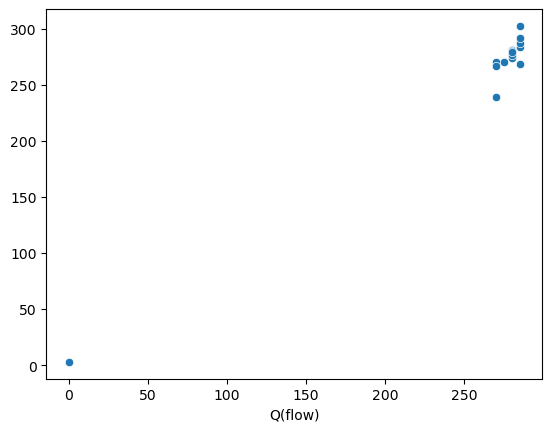

In [57]:
sns.scatterplot(x=y_test, y=y_pred)